## Importing Libraries 

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df = pd.read_csv("dataframe_.csv")

In [9]:
df.head()

input      output
0 -122.740667 -130.572085
1 -121.531419 -129.938929
2 -134.917019 -130.141832
3 -120.605951 -125.760932
4 -129.894781 -112.785214

## EDA 

In [10]:
df.isnull().sum()

input     1
output    1
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


In [12]:
df.describe()

input       output
count  1696.000000  1696.000000
mean      1.159933   -34.088017
std      79.005970    65.771112
min    -134.962839  -132.422167
25%     -63.386506   -80.026767
50%      10.195194   -50.470981
75%      70.264109   -11.000000
max     134.605775   134.425495

In [13]:
df.dropna(inplace = True)

In [14]:
df.shape

(1696, 2)

In [15]:
df.isnull().sum()

input     0
output    0
dtype: int64

<BarContainer object of 1696 artists>

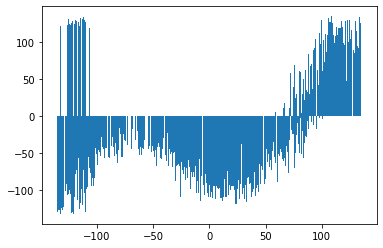

In [16]:
plt.bar(df['input'], df['output'])

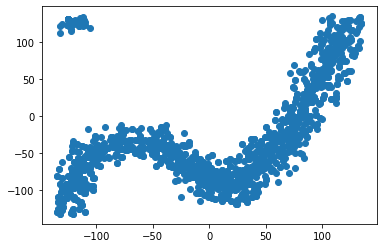

In [17]:
plt.scatter(df['input'], df['output'])

In [18]:
#There are some outliers present in our data we well deal with it later

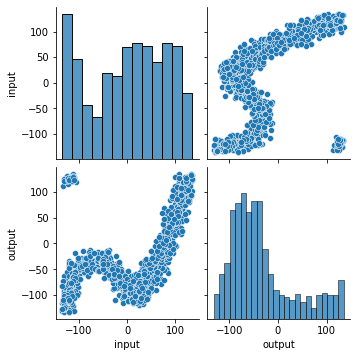

In [19]:
sns.pairplot(df)

In [20]:
df.duplicated().sum()

606

In [21]:
#Removing dupliacate values

In [22]:
df.drop_duplicates(inplace = True)

In [23]:
df.shape

(1090, 2)

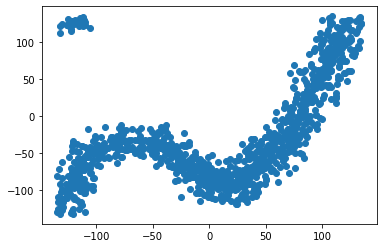

In [24]:
plt.scatter(df['input'], df['output'])

<BarContainer object of 1090 artists>

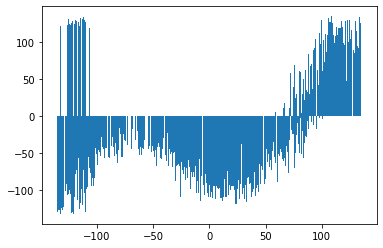

In [25]:
plt.bar(df['input'], df['output'])

In [26]:
hist = px.histogram(df, 'input', 'output' , marginal = 'box' )
hist.update_layout(bargap=.2)

array([[<AxesSubplot:title={'center':'input'}>,
        <AxesSubplot:title={'center':'output'}>]], dtype=object)

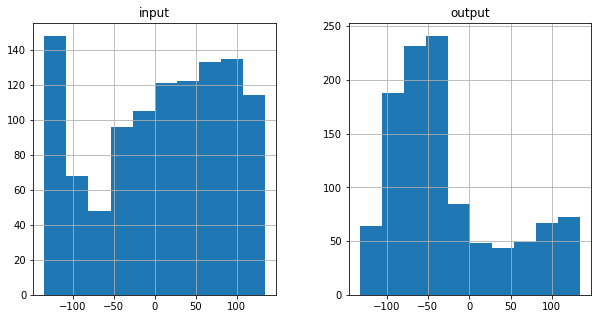

In [27]:
df.hist(figsize = (10,5))

# Building Model

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [29]:
x = df.drop('output', axis = 1)

In [30]:
x.shape

(1090, 1)

In [31]:
y = df['output']
y.shape

(1090,)

# Linear Regression

In [32]:
LinReg = LinearRegression()

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2, random_state = 355)

In [35]:
LinReg.fit(x_train,y_train)

LinearRegression()

In [36]:
LinReg_pred = LinReg.predict(x_test)

In [37]:
from sklearn.metrics import r2_score

In [42]:
LinReg.score(x_test,y_test)

0.22003147376862187

### Linear Regression deals with data which can be linearly seperable. In this case it's not 

# Decision Tree

In [43]:
DT = DecisionTreeRegressor(criterion='squared_error', random_state = 100)

In [44]:
DT.fit(x_train,y_train)

DecisionTreeRegressor(random_state=100)

In [45]:
DT_pred = DT.predict(x_test)

In [46]:
DT.score(x_test,y_test)

0.5574412830794584

## Due to small data DT can not interpret the underlying patterns 

## Random Forest

In [237]:
RF = RandomForestRegressor(criterion='absolute_error',random_state = 100, n_estimators=100,max_depth=10)

In [238]:
RF.fit(x_train, y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      random_state=100)

In [239]:
RF.score(x_test,y_test)

0.6924358089540279

## SVM 

In [66]:
SVM = SVR(kernel='rbf',degree=3)

In [67]:
SVM.fit(x_train,y_train)

SVR()

In [ ]:
SVM.score(x_test,y_test)

## KNN 

In [73]:
KNN = KNeighborsRegressor(n_neighbors=5,)

In [75]:
KNN.fit(x_train,y_train)

KNeighborsRegressor()

In [76]:
KNN.score(x_test,y_test)

0.6677644915844712

## KNN PCA

In [260]:
from sklearn.decomposition import PCA

In [261]:
pca = PCA(0.95)

In [262]:
knn_x_pca_train = pca.fit_transform(x_train)
knn_x_pca_test = pca.transform(x_test)

In [263]:
pca.explained_variance_ratio_

array([1.])

In [264]:
KNN.fit(knn_x_pca_train,y_train)

KNeighborsRegressor(leaf_size=100, n_neighbors=20, p=1)

In [265]:
KNN.score(knn_x_pca_test,y_test)

0.7147732821172401

In [281]:
# Accuracy increased by approx 5%

## Random Forest PCA 

In [267]:
rf_x_pca_train = pca.fit_transform(x_train)
rf_x_pca_test = pca.transform(x_test)

In [268]:
pca.explained_variance_ratio_

array([1.])

In [269]:
RF.fit(rf_x_pca_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      random_state=100)

In [270]:
RF.score(rf_x_pca_test,y_test)

0.6896319444405834

In [271]:
#PCA is decreasing the accuracy

## Cross Validation for KNN

In [272]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [273]:
knn_kfold = KFold(n_splits=2, shuffle= True, random_state=100)

In [274]:
knn_scores = cross_val_score(KNN,knn_x_pca_train,y_train, cv=kfold)

In [275]:
knn_scores

array([0.63810024, 0.60816347, 0.71555851, 0.54609625, 0.73838614,
       0.60981557, 0.73505605, 0.66264181, 0.66279352, 0.85075589])

In [276]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 61.63% (9.86%)


## Cross Validation for Random Forest

In [277]:
rf_kfold = KFold(n_splits=10, shuffle= True, random_state=42)

In [278]:
rf_scores = cross_val_score(RF,rf_x_pca_train,y_train, cv=kfold)

In [279]:
rf_scores

array([0.57241604, 0.52462568, 0.64823449, 0.51339762, 0.74284746,
       0.56744882, 0.62690226, 0.55589646, 0.56894583, 0.84184771])

In [280]:
print("Accuracy: %.2f%% (%.2f%%)" % (scores.mean()*100, scores.std()*100))

Accuracy: 61.63% (9.86%)


#### Looks like cross validation is decreasing our accuracy

##  Finding Optimal Parameter for KNN 

In [282]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import uniform, randint

In [283]:
GBC = GradientBoostingClassifier()

In [284]:
params = {
    "n_neighbors": (1,20,1),
    "weights" : ['uniform', 'distance'],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    "leaf_size": (1,100,5),
    "p": [1,2],
}

In [285]:
grid_GBC = GridSearchCV(estimator=KNN,param_grid = params,cv = 2 ,n_jobs = 1)
grid_GBC.fit(knn_x_pca_train,y_train)

GridSearchCV(cv=2,
             estimator=KNeighborsRegressor(leaf_size=100, n_neighbors=20, p=1),
             n_jobs=1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': (1, 100, 5), 'n_neighbors': (1, 20, 1),
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [286]:
print("The best estimator across ALL searched params:\n",grid_GBC.best_estimator_)

The best estimator across ALL searched params:
 KNeighborsRegressor(leaf_size=100, n_neighbors=20, p=1)


In [287]:
print("The best score across ALL searched params: \n", grid_GBC.best_score_)

The best score across ALL searched params: 
 0.6782566651721198


In [288]:
print("The best parameters across ALL searched params: \n", grid_GBC.best_params_)

The best parameters across ALL searched params: 
 {'algorithm': 'auto', 'leaf_size': 100, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


## FineTune our Final Model

In [294]:
final_KNN = KNeighborsRegressor(algorithm= 'auto', leaf_size= 100, n_neighbors =  20, p =  1, weights = 'uniform')

In [296]:
final_KNN.fit(knn_x_pca_train,y_train)

KNeighborsRegressor(leaf_size=100, n_neighbors=20, p=1)

In [297]:
KNN.score(x_pca_test,y_test)

0.7147732821172401

### We have achieved accuracy of 71.47% after cross validation and fine tuning our model with the best parameters 

In [293]:
import pickle

In [299]:
filename = 'hackathon.sav'
pickle.dump(final_KNN, open(filename, 'wb'))
load_model = pickle.load(open(filename, 'rb'))
model_score_r4 = load_model.score(knn_x_pca_test, y_test)
model_score_r4

0.7147732821172401